<a id="top"></a>

# Table of Content

1. [Simple Explanation of Gradient Descent](#simple)
2. [Setup](#setup)<br>
    1.1 [Import](#import)<br>
    1.2 [Function Choices](#func)<br>
    1.3 [Gradient Function](#grad)<br>
3. [Plain Vanilla Experiment (Step size)](#pve)
4. [Gradient Descent Variant performance experiment](#vare)
5. [Noisy Hill Function Experiment](#noisy)
6. [Ackley Function Experiment](#ack)
7. [Six Hump Function Experiment](#six)

**Authors**

Group 18

Copyright (C) 2019 Avery Soh, Brandon Foo, Ke Zhang, Sharron

Last Updated: 11 July 2019

Sources:
- http://ruder.io/optimizing-gradient-descent/
- http://www.sfu.ca/~ssurjano/optimization.html

<a id="simple"></a>

# Simple Explanation of Gradient Descent

### Why is gradient descent important in machine learning? 
Gradient Descent is an optimisation algorithm for machine learning. Gradient Descent helps us find the smallest value (or when the descent ends or is trapped in a local minima) of a cost function. The optimisation process is done via adjusting the weights/values of the parameters, where this adjustment is determined by the learning rate set.  This cost function acts as inaccuracy within our machine learning model or deviations from the true value. 

### How does plain vanilla gradient descent work?
Think of a mountain range and at the lowest points of these mountain ranges, we have diamonds *[diamonds = ideal parameters at minima]*. Now take a person, Bob starting at any point of these mountains blindfolded *[Not knowing every value for every possible parameter]*. Bob takes one step at a time *[Greedy algorithm and each step within each update to parameters, size of steps are learning rate]*, in whichever direction that he feels is descending fastest.  Eventually Bob will reach the bottom or he runs out of energy *[limitation to iteration loops (or computational limitations)]* 

### Two modifications to plain vanilla gradient descent.
Now we already understand plain vanilla gradient descent from the analogy above, expanding on that analogy we introduce momentum and adam. **Momentum** can be thought of as a big ball rolling down the mountain, the longer it rolls downhill, the more acceleration it picks up. We gain faster convergence and reduced oscillation **Adam** can be thought of the same ball rolling down the hil, but now we account for friction. This friction exist in the form of past decaying gradients from the first and second moment.

[Top](#top)

<a id="setup"></a>

# Setup

<a id="import"></a>

## Import

In [1]:
%matplotlib notebook
import autograd.numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from autograd import elementwise_grad, value_and_grad
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

from matplotlib import cm
from itertools import zip_longest

from gd import gd

Also requires installaion of [autograd](https://github.com/HIPS/autograd) which differentiates the loss funcitons.

>Instructions `pip install autograd`


(Optional) installation of ffmpeg to produce videos

>Install [Homebrew](https://brew.sh/)

>Next `brew install ffmpeg`


(Optional) installation of imagemagick to produce gif

>Install [Homebrew](https://brew.sh/)

>Next `brew install imagemagick`


[Top](#top)

<a id="func"></a>

## Function Choices

**Ackley Function**

$$f(x) = -a*exp\left(-b\sqrt{\frac{1}{d}\sum_{i=1}^{d}{x_i^2}}\right)-exp\left(\frac{1}{d}\sum_{i=1}^{d}{cos(cx_i)}\right)+a+exp(1)$$

In [2]:
a,b,c = 20,0.2,2*np.pi
ackley_fn = lambda x,y: -a*np.exp(-b*np.sqrt(1/2*(x**2+y**2)))-np.exp(1/2*(np.cos(c*x)+np.cos(c*y)))+a+np.exp(1)

**Noisy Function**

$$ f(x) = sin(x_1^2)cos(3x_2^2)*exp-\left(x_1x_2\right)^2-exp\left(-2\left(x_1 + x_2\right)\right)$$


In [3]:
noisy_fn = lambda x,y : np.sin(x**2) * np.cos(3 * y**2) * np.exp(-(x * y) * (x * y)) - np.exp(-(x + y) * (x + y))

**Six-Hump Camel Function**

$$ f(x) = \left( 4 - 2.1x_1^2 + \frac{x_1^4}{3}\right)x_1^2 + x_1x_2 + \left(-4 + 4x_2^2\right)x_2^2 $$

Recommended Parameters
- xmin = -1
- xmax = 1
- ymin = -2
- ymax = 2


Global Minimum is f(x) = -1.0316

At np.array([0.0898, -0.7126],[-0.0898, 0.7126])

In [4]:
sixhump_fn = lambda x,y : (4 - 2.1*x**2 + ((x**4)/3)) * x**2 + x * y + (-4 + 4 * y**2) * y**2

**Holder Table Function**

$$ f(x) = -\left|sin(x_1)cos(x_2)*exp\left(\left|1-\frac{\sqrt{x_1^2+x_2^2}}{\pi}\right|\right) \right|$$

We know the global minimum is f(x) = -19.2085

at minima = np.array([[8.05502,-8.05502,8.05502,-8.05502],[9.66459,9.66459,-9.66459,-9.66459]])

In [5]:
holder_fn = lambda x,y: -abs(np.sin(x)*np.cos(y)*np.exp(abs(1-np.sqrt(x**2+y**2)/np.pi)))

**Shubert Function**

$$f(\mathbf{x})={\left(\sum_{i=1}^5{i \space cos((i+1)x_1+i)}\right)}{\left(\sum_{i=1}^5{i \space cos((i+1)x_2+i)}\right)}$$

In [6]:
def shubert_fn(x_1, x_2):
    sum1 = 0
    sum2 = 0
    
    for i in range(1,6):
        new1 = i * np.cos(i + 1) * x_1 + i
        new2 = i * np.cos(i + 1) * x_2 + i
        
        sum1 = sum1 + new1
        sum2 = sum2 + new2
        
    y = sum1 * sum2
    
    return y

[Top](#top)

<a id="grad"></a>

## Gradient Function

Autograd differentiates the function to obtain the gradient. This current function works only for 2 variables.

In [7]:
def fn_grad(fn, x1, x2):
    dy_dx1 = elementwise_grad(fn, argnum=0)(x1, x2)
    dy_dx2 = elementwise_grad(fn, argnum=1)(x1, x2)
    
    return dy_dx1, dy_dx2

[Top](#top)

<a id="pve"></a>

# Plain Vanilla Experiment (Step size)

<IPython.core.display.Javascript object>


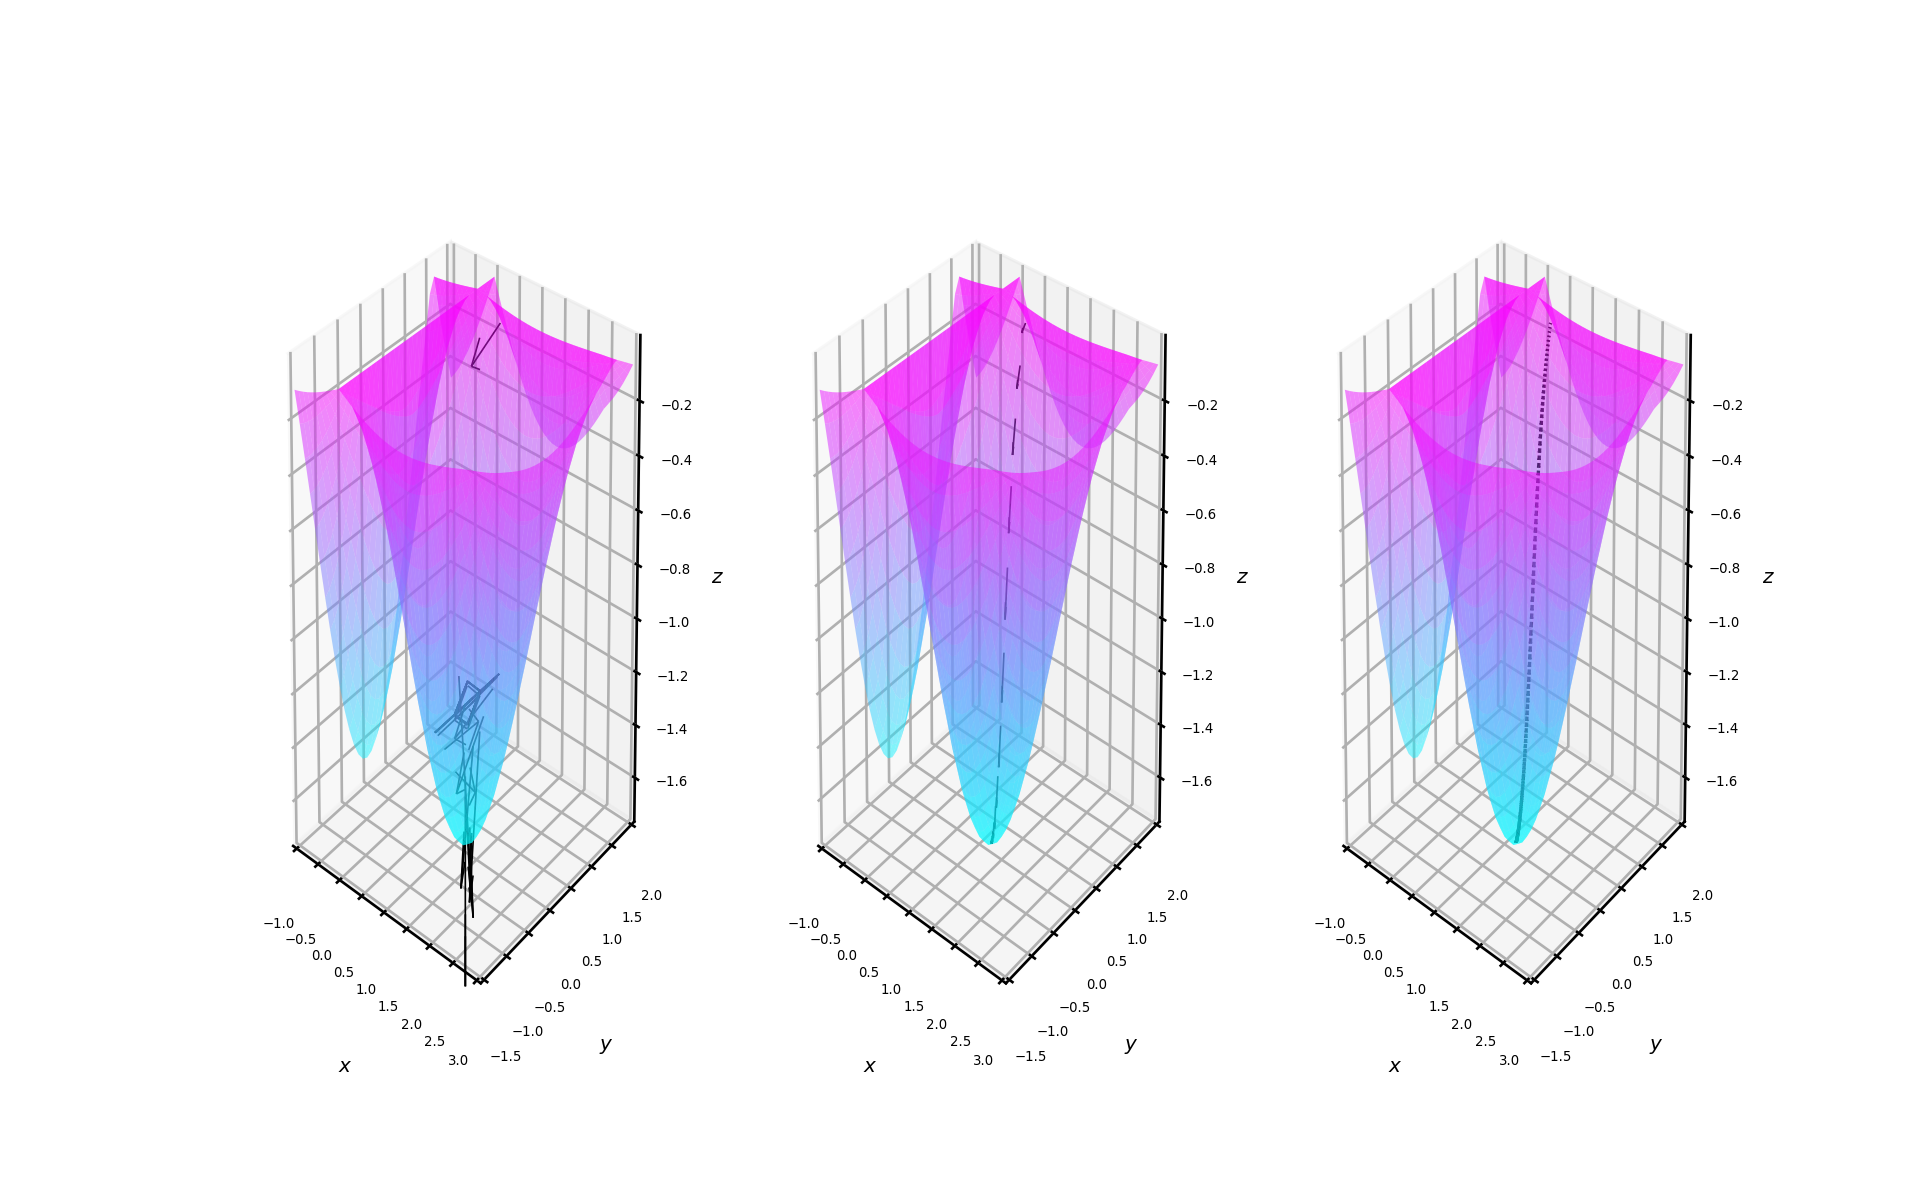

  Plain Vanilla   
Converged in 26 steps.  
Loss fn -1.2029 
Achieved at coordinates x,y = (1.3008, -0.7389)
  Plain Vanilla   
Converged in 37 steps.  
Loss fn -1.7330 
Achieved at coordinates x,y = (1.2626, 0.0000)
  Plain Vanilla   
Converged in 412 steps.  
Loss fn -1.7330 
Achieved at coordinates x,y = (1.2626, 0.0000)


In [8]:
# Set Parameters and return array of x,y,z
xmin, xmax, xstep = -1, 3, 0.1
ymin, ymax, ystep = -1.5, 2, 0.1

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = holder_fn(x, y)

# Initiate gradient descent 
gd_ = gd(fn = holder_fn, fn_grad=fn_grad)

fig = plt.figure(figsize=(8, 5), dpi=120)


#===============
# First subplot
#===============
# Obtain the path taken by pv gradient descent  with lr = 1.15
x_path, y_path,z_path = gd_.pv(x_init=0.6, y_init=1.5, n_iter=2000,lr=1.15, tol= 1e-5)
path = np.vstack((x_path, y_path))


# Plot figure 1 with step size (lr) = 1.15
ax = fig.add_subplot(1, 3, 1, projection='3d', elev=20, azim=-50)
ax.plot_surface(x, y, z, rstride=1, cstride=1, 
                edgecolor='none', alpha=.5, cmap=plt.cm.cool)
ax.quiver(path[0,:-1], path[1,:-1], holder_fn(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], holder_fn(*(path[::,1:]-path[::,:-1])),
          length = 0.7, linewidth = 0.5,
          color='black')

ax.set_xlabel('$x$', fontsize = 6)
ax.set_ylabel('$y$', fontsize = 6)
ax.set_zlabel('$z$', fontsize = 6)

ax.xaxis.set_tick_params(labelsize=4)
ax.yaxis.set_tick_params(labelsize=4)
ax.zaxis.set_tick_params(labelsize=4)

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))


#===============
# Second subplot
#===============
# Obtain the path taken by pv gradient descent  with lr = 0.15
x_path, y_path,z_path = gd_.pv(x_init=0.6, y_init=1.5, n_iter=2000,lr=0.15, tol= 1e-5)
path = np.vstack((x_path, y_path))

# Plot figure 1 with step size (lr) = 0.15
ax = fig.add_subplot(1, 3, 2, projection='3d', elev=20, azim=-50)
ax.plot_surface(x, y, z, rstride=1, cstride=1, 
                edgecolor='none', alpha=.5, cmap=plt.cm.cool)
ax.quiver(path[0,:-1], path[1,:-1], holder_fn(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], holder_fn(*(path[::,1:]-path[::,:-1])),
          length = 0.7, linewidth = 0.5,
          color='black')

ax.set_xlabel('$x$', fontsize = 6)
ax.set_ylabel('$y$', fontsize = 6)
ax.set_zlabel('$z$', fontsize = 6)

ax.xaxis.set_tick_params(labelsize=4)
ax.yaxis.set_tick_params(labelsize=4)
ax.zaxis.set_tick_params(labelsize=4)

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))


#===============
# Third subplot
#===============
# Obtain the path taken by pv gradient descent with lr = 0.015
x_path, y_path,z_path = gd_.pv(x_init=0.6, y_init=1.5, n_iter=2000,lr=0.015, tol= 1e-5)
path = np.vstack((x_path, y_path))

# Plot figure 1 with step size (lr) = 0.015
ax = fig.add_subplot(1, 3, 3, projection='3d', elev=20, azim=-50)
ax.plot_surface(x, y, z, rstride=1, cstride=1, 
                edgecolor='none', alpha=.5, cmap=plt.cm.cool)
ax.quiver(path[0,:-1], path[1,:-1], holder_fn(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], holder_fn(*(path[::,1:]-path[::,:-1])),
          length = 0.7, linewidth = 1,
          color='black')

ax.set_xlabel('$x$', fontsize = 6)
ax.set_ylabel('$y$', fontsize = 6)
ax.set_zlabel('$z$', fontsize = 6)

ax.xaxis.set_tick_params(labelsize=4)
ax.yaxis.set_tick_params(labelsize=4)
ax.zaxis.set_tick_params(labelsize=4)

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))


plt.show()
#plt.savefig('pv_stepsize.png')

**Large step size** (Left plot)
<br>Notice here that the gradient descend converges the earliest however, it did not reach a minimum as 
low as the other (premature convergence). Due to the large step size, the path taken bounced around and missed the true minimum.

**Medium step size** (Center plot)
<br>Here there was quite a smooth descend into the minimum. Achieving a minimised loss function of -1.733 after 37 iterations. 

**Small step size** (Right plot)
<br>The same minimum was still achived however at a significantly slower pace with 412 iterations instead. This is due to the smaller step size. If we limited the iterations to 100, the algorithm would have stopped prematurely. 

[Top](#top)

<a id="vare"></a>

# Gradient Descent Variant performance experiment

**Experimentation with 2 variants of GD**

Here we test the performance to see if momentum or adam reaches the minima before the plain vanilla method

  Momentum   
Converged in 135 steps.  
Loss fn -1.7330 
Achieved at coordinates x,y = (1.2628, -0.0011)
  Plain Vanilla   
Converged in 412 steps.  
Loss fn -1.7330 
Achieved at coordinates x,y = (1.2626, 0.0000)
  Adam   
Converged in 175 steps.  
Loss fn -1.7330 
Achieved at coordinates x,y = (1.2627, -0.0026)


<IPython.core.display.Javascript object>


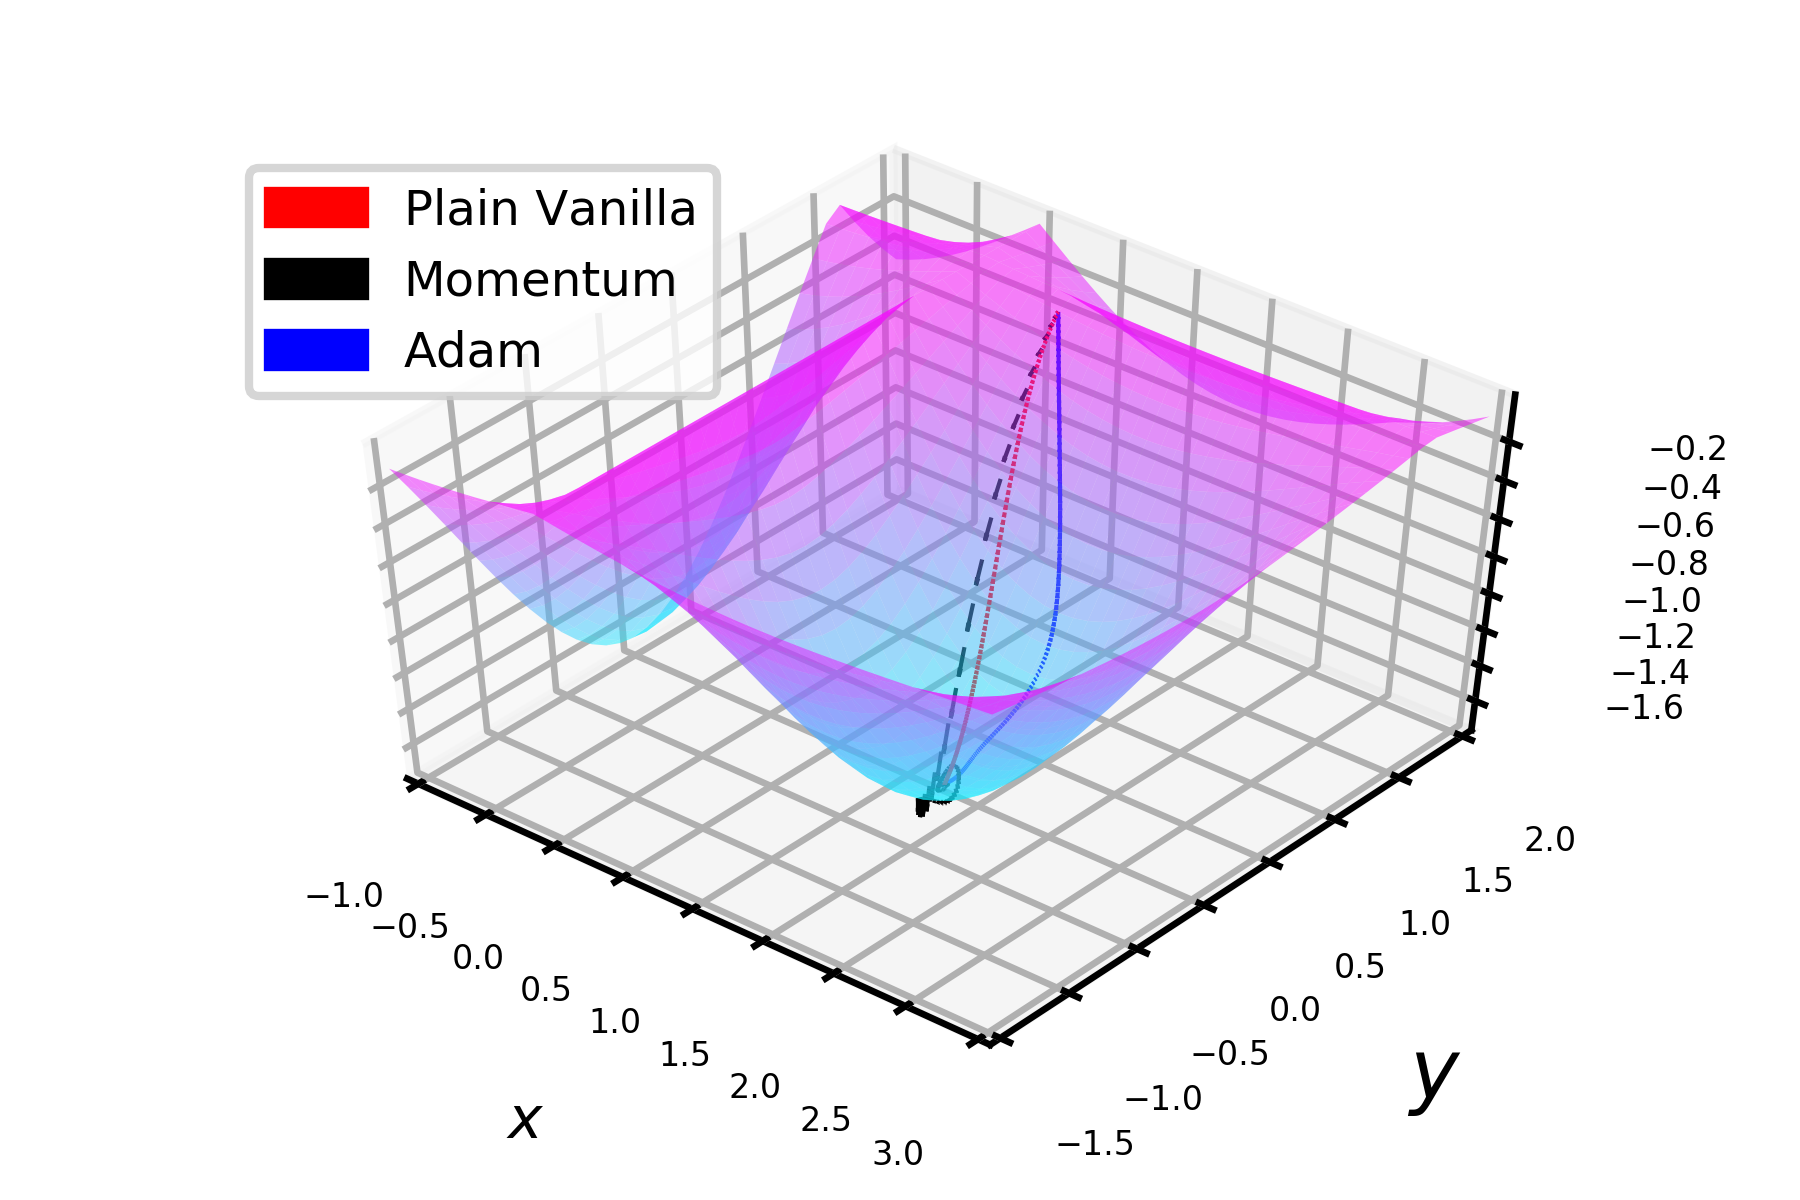

In [9]:
# Set Parameters and return array of x,y,z
xmin, xmax, xstep = -1, 3, 0.1
ymin, ymax, ystep = -1.5, 2, 0.1

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = holder_fn(x, y)

n_iter = 2000
lr = 0.015

# Initiate gradient descent 
gd_ = gd(fn = holder_fn, fn_grad=fn_grad)


# Obtain the path taken by momentum gradient descent 
x_path, y_path, z_path = gd_.momentum(x_init=0.6,y_init=1.5, n_iter=n_iter,lr=lr, 
                          beta = 0.9, tol= 1e-5)
path = np.vstack((x_path, y_path))

# Obtain the path taken by pv gradient descent 
x_path_, y_path_, z_path = gd_.pv(x_init=0.6,y_init=1.5, n_iter=n_iter,lr=lr, 
                      tol= 1e-5)
pv_path = np.vstack((x_path_, y_path_))

# Obtain the path taken by adam 
x_path_1, y_path_1, z_path = gd_.adam(x_init=0.6, y_init=1.5, n_iter= n_iter, lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
adam_path = np.vstack((x_path_1, y_path_1))


# Plot figure
fig = plt.figure(figsize=(3, 2), dpi=300)
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, rstride=1, cstride=1, 
                edgecolor='none', alpha=.5, cmap=plt.cm.cool)

ax.quiver(path[0,:-1], path[1,:-1], holder_fn(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], holder_fn(*(path[::,1:]-path[::,:-1])),
          length = 0.7, linewidth = 0.5,
          color='black')

ax.quiver(pv_path[0,:-1], pv_path[1,:-1], holder_fn(*pv_path[::,:-1]), 
          pv_path[0,1:]-pv_path[0,:-1], pv_path[1,1:]-pv_path[1,:-1], holder_fn(*(pv_path[::,1:]-pv_path[::,:-1])),
          length = 0.7, linewidth = 0.5,
          color='red')

ax.quiver(adam_path[0,:-1], adam_path[1,:-1], holder_fn(*adam_path[::,:-1]), 
          adam_path[0,1:]-adam_path[0,:-1], adam_path[1,1:]-adam_path[1,:-1], holder_fn(*(adam_path[::,1:]-adam_path[::,:-1])),
          length = 0.7, linewidth = 0.5,
          color='blue')

ax.set_xlabel('$x$', fontsize = 7)
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.xaxis.set_tick_params(labelsize=4)
ax.yaxis.set_tick_params(labelsize=4)
ax.zaxis.set_tick_params(labelsize=4)


ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

leg_1 = mpatches.Patch(color='red', label='Plain Vanilla')
leg_2 = mpatches.Patch(color='black', label='Momentum')
leg_3 = mpatches.Patch(color='blue', label='Adam')
ax.legend(handles=[leg_1,leg_2,leg_3],loc = "upper left", fontsize = 'xx-small')

plt.show()

**Review**

All of the variants of GD reached the minima at the same point. However, Momentum converged much faster, with fewer steps thanks to the accelerative properties, which also caused it spiral around before finding the minima. Adam was 2nd to converge due to the friction caused by the decaying past gradients of the first and second moment. Plain Vanilla took the same number of steps as the earlier test. 

[Top](#top)

<a id="noisy"></a>

# Noisy Hill Function Experiment

Here we challenge ourself by experimenting with 8 variants of GD and animate them so we can now get a better view of the speed (number of steps) of the individual methos.

In [10]:
# Animation function
class TrajectoryAnimation3D(animation.FuncAnimation):
    
    def __init__(self, *paths, zpaths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths
        self.zpaths = zpaths
        
        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]

        super(TrajectoryAnimation3D, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line in self.lines:
            line.set_data([], [])
            line.set_3d_properties([])
        return self.lines

    def animate(self, i):
        for line, path, zpath in zip(self.lines, self.paths, self.zpaths):
            line.set_data(*path[::,:i])
            line.set_3d_properties(zpath[:i])
        return self.lines

**Organise the paths into a DataFrame**

In [24]:
gd_ = gd(fn = noisy_fn, fn_grad=fn_grad)

In [25]:
x_init = 1.1
y_init = 0.0
n_iter = 500
lr = 0.01


# Obtain the path taken by pv gradient descent 
x_path_, y_path_, junk = gd_.pv(x_init=x_init,y_init=y_init, n_iter=n_iter, lr=lr, tol= 1e-5)
pv_path = np.vstack((x_path_, y_path_))

# Obtain the path taken by momentum gradient descent 
x_path, y_path, junk = gd_.momentum(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr, 
                          beta = 0.9)
momentum_path = np.vstack((x_path, y_path))

# Obtain the path taken by adam 
x_path_1, y_path_1, junk = gd_.adam(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
adam_path = np.vstack((x_path_1, y_path_1))

# Obtain the path taken by adamax 
x_path_2, y_path_2, junk = gd_.adamax(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
adamax_path = np.vstack((x_path_2, y_path_2))

# Obtain the path taken by Nadam
x_path_3, y_path_3, junk = gd_.nadam(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
nadam_path = np.vstack((x_path_3, y_path_3))

# Obtain the path taken by AMSGrad
x_path_4, y_path_4, junk = gd_.amsgrad(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
amsgrad_path = np.vstack((x_path_4, y_path_4))

# Obtain the path taken by Nesterov accelerated gradient
x_path_5, y_path_5, junk = gd_.nag(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr)
nag_path = np.vstack((x_path_5, y_path_5))

# Obtain the path taken by RMSprop
x_path_6, y_path_6, junk = gd_.RMSprop(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr)
rmsprop_path = np.vstack((x_path_6, y_path_6))

  Plain Vanilla   
Converged in 499 steps.  
Loss fn -0.9999 
Achieved at coordinates x,y = (0.0082, -0.0133)
  Momentum   
Converged in 194 steps.  
Loss fn -1.0000 
Achieved at coordinates x,y = (0.0000, -0.0000)
  Adam   
Converged in 232 steps.  
Loss fn -1.3188 
Achieved at coordinates x,y = (0.9365, -0.9703)
  AdaMax   
Converged in 250 steps.  
Loss fn -1.3188 
Achieved at coordinates x,y = (0.9368, -0.9703)
  Nadam   
Converged in 199 steps.  
Loss fn -1.3188 
Achieved at coordinates x,y = (0.9368, -0.9703)
  AMSGrad   
Converged in 216 steps.  
Loss fn -1.3188 
Achieved at coordinates x,y = (0.9368, -0.9703)
  Nesterov accelerated gradient   
Converged in 134 steps.  
Loss fn -1.0000 
Achieved at coordinates x,y = (-0.0001, 0.0001)
  RMSprop   
Converged in 133 steps.  
Loss fn -1.3188 
Achieved at coordinates x,y = (0.9369, -0.9703)


In [26]:
methods = [
    "Plain Vanilla",
    "Momentum",
    "Adam",
    "AdaMax",
    "Nadam",
    "AMSGrad",
    "Nesterov accelerated gradient",
    "RMSprop"
]

pv_df = pd.DataFrame(pv_path)
pv_df.rename(index = {0: "Plain Vanilla", 
                     1:"Plain Vanilla"}, inplace = True) 

momen_df = pd.DataFrame(momentum_path)
momen_df.rename(index = {0: "Momentum", 
                     1:"Momentum"}, inplace = True) 

adam_df = pd.DataFrame(adam_path)
adam_df.rename(index = {0: "Adam", 
                     1:"Adam"}, inplace = True) 

adamax_df = pd.DataFrame(adamax_path)
adamax_df.rename(index = {0: "AdaMax", 
                     1:"AdaMax"}, inplace = True) 

nadam_df = pd.DataFrame(adamax_path)
nadam_df.rename(index = {0: "Nadam", 
                     1:"Nadam"}, inplace = True) 

amsgrad_df = pd.DataFrame(adamax_path)
amsgrad_df.rename(index = {0: "AMSGrad", 
                     1:"AMSGrad"}, inplace = True) 

rmsprop_df = pd.DataFrame(rmsprop_path)
rmsprop_df.rename(index = {0: "RMSprop", 
                     1:"RMSprop"}, inplace = True) 

nag_df = pd.DataFrame(nag_path)
nag_df.rename(index = {0: "Nesterov accelerated gradient", 
                     1:"Nesterov accelerated gradient"}, inplace = True) 


paths_ = pv_df
paths_ = paths_.append(momen_df)
paths_ = paths_.append(adam_df)
paths_ = paths_.append(adamax_df)
paths_ = paths_.append(nadam_df)
paths_ = paths_.append(amsgrad_df)
paths_ = paths_.append(rmsprop_df)
paths_ = paths_.append(nag_df)


# Draw path and loss path from individual methods
paths = [np.array(paths_.loc[method]) for method in methods]

zpaths = [noisy_fn(*path) for path in paths]

paths_

0         1         2         3         4    \
Plain Vanilla                  1.1  1.085673  1.070641  1.054912  1.038500   
Plain Vanilla                  0.0 -0.006560 -0.013439 -0.020635 -0.028145   
Momentum                       1.1  1.085673  1.057747  1.016321  0.961150   
Momentum                       0.0 -0.006560 -0.019343 -0.038303 -0.063569   
Adam                           1.1  1.090000  1.076522  1.064823  1.053765   
Adam                           0.0 -0.010000 -0.023482 -0.035188 -0.046259   
AdaMax                         1.1  1.090000  1.071326  1.057742  1.045806   
AdaMax                         0.0 -0.010000 -0.028497 -0.041740 -0.053312   
Nadam                          1.1  1.090000  1.071326  1.057742  1.045806   
Nadam                          0.0 -0.010000 -0.028497 -0.041740 -0.053312   
AMSGrad                        1.1  1.090000  1.071326  1.057742  1.045806   
AMSGrad                        0.0 -0.010000 -0.028497 -0.041740 -0.053312   
RMSprop                        1.1  1.090000  1.079663  1.069034  1.058160   
RMSprop                        0.0 -0.010000 -0.020528 -0.031520 -0.042906   
Nesterov accelerated gradient  1.1  1.085673  1.057362  1.014853  0.957762   
Nesterov accelerated gradient  0.0 -0.006560 -0.019518 -0.038978 -0.065150   

                                    5         6         7         8    \
Plain Vanilla                  1.021425  1.003715  0.985408  0.966544   
Plain Vanilla                 -0.035964 -0.044082 -0.052486 -0.061161   
Momentum                       0.891993  0.809030  0.713307  0.607126   
Momentum                      -0.095300 -0.133490 -0.177728 -0.226930   
Adam                           1.043027  1.032474  1.022035  1.011668   
Adam                          -0.057017 -0.067599 -0.078076 -0.088490   
AdaMax                         1.034687  1.024053  1.013739  1.003645   
AdaMax                        -0.064058 -0.074311 -0.084238 -0.093936   
Nadam                          1.034687  1.024053  1.013739  1.003645   
Nadam                         -0.064058 -0.074311 -0.084238 -0.093936   
AMSGrad                        1.034687  1.024053  1.013739  1.003645   
AMSGrad                       -0.064058 -0.074311 -0.084238 -0.093936   
RMSprop                        1.047085  1.035856  1.024514  1.013096   
RMSprop                       -0.054614 -0.066574 -0.078723 -0.091003   
Nesterov accelerated gradient  0.886011  0.800355  0.702862  0.597142   
Nesterov accelerated gradient -0.098144 -0.137700 -0.182878 -0.231809   

                                    9    ...       491       492       493  \
Plain Vanilla                  0.947174  ...  0.008795  0.008728  0.008661   
Plain Vanilla                 -0.070087  ... -0.014230 -0.014122 -0.014014   
Momentum                       0.494219  ...       NaN       NaN       NaN   
Momentum                      -0.279118  ...       NaN       NaN       NaN   
Adam                           1.001348  ...       NaN       NaN       NaN   
Adam                          -0.098870  ...       NaN       NaN       NaN   
AdaMax                         0.993710  ...       NaN       NaN       NaN   
AdaMax                        -0.103468  ...       NaN       NaN       NaN   
Nadam                          0.993710  ...       NaN       NaN       NaN   
Nadam                         -0.103468  ...       NaN       NaN       NaN   
AMSGrad                        0.993710  ...       NaN       NaN       NaN   
AMSGrad                       -0.103468  ...       NaN       NaN       NaN   
RMSprop                        1.001637  ...       NaN       NaN       NaN   
RMSprop                       -0.103365  ...       NaN       NaN       NaN   
Nesterov accelerated gradient  0.488084  ...       NaN       NaN       NaN   
Nesterov accelerated gradient -0.281702  ...       NaN       NaN       NaN   

                                    494       495       496       497  \
Plain Vanilla                  0.008595  0.008529  0.008464  0

<IPython.core.display.Javascript object>


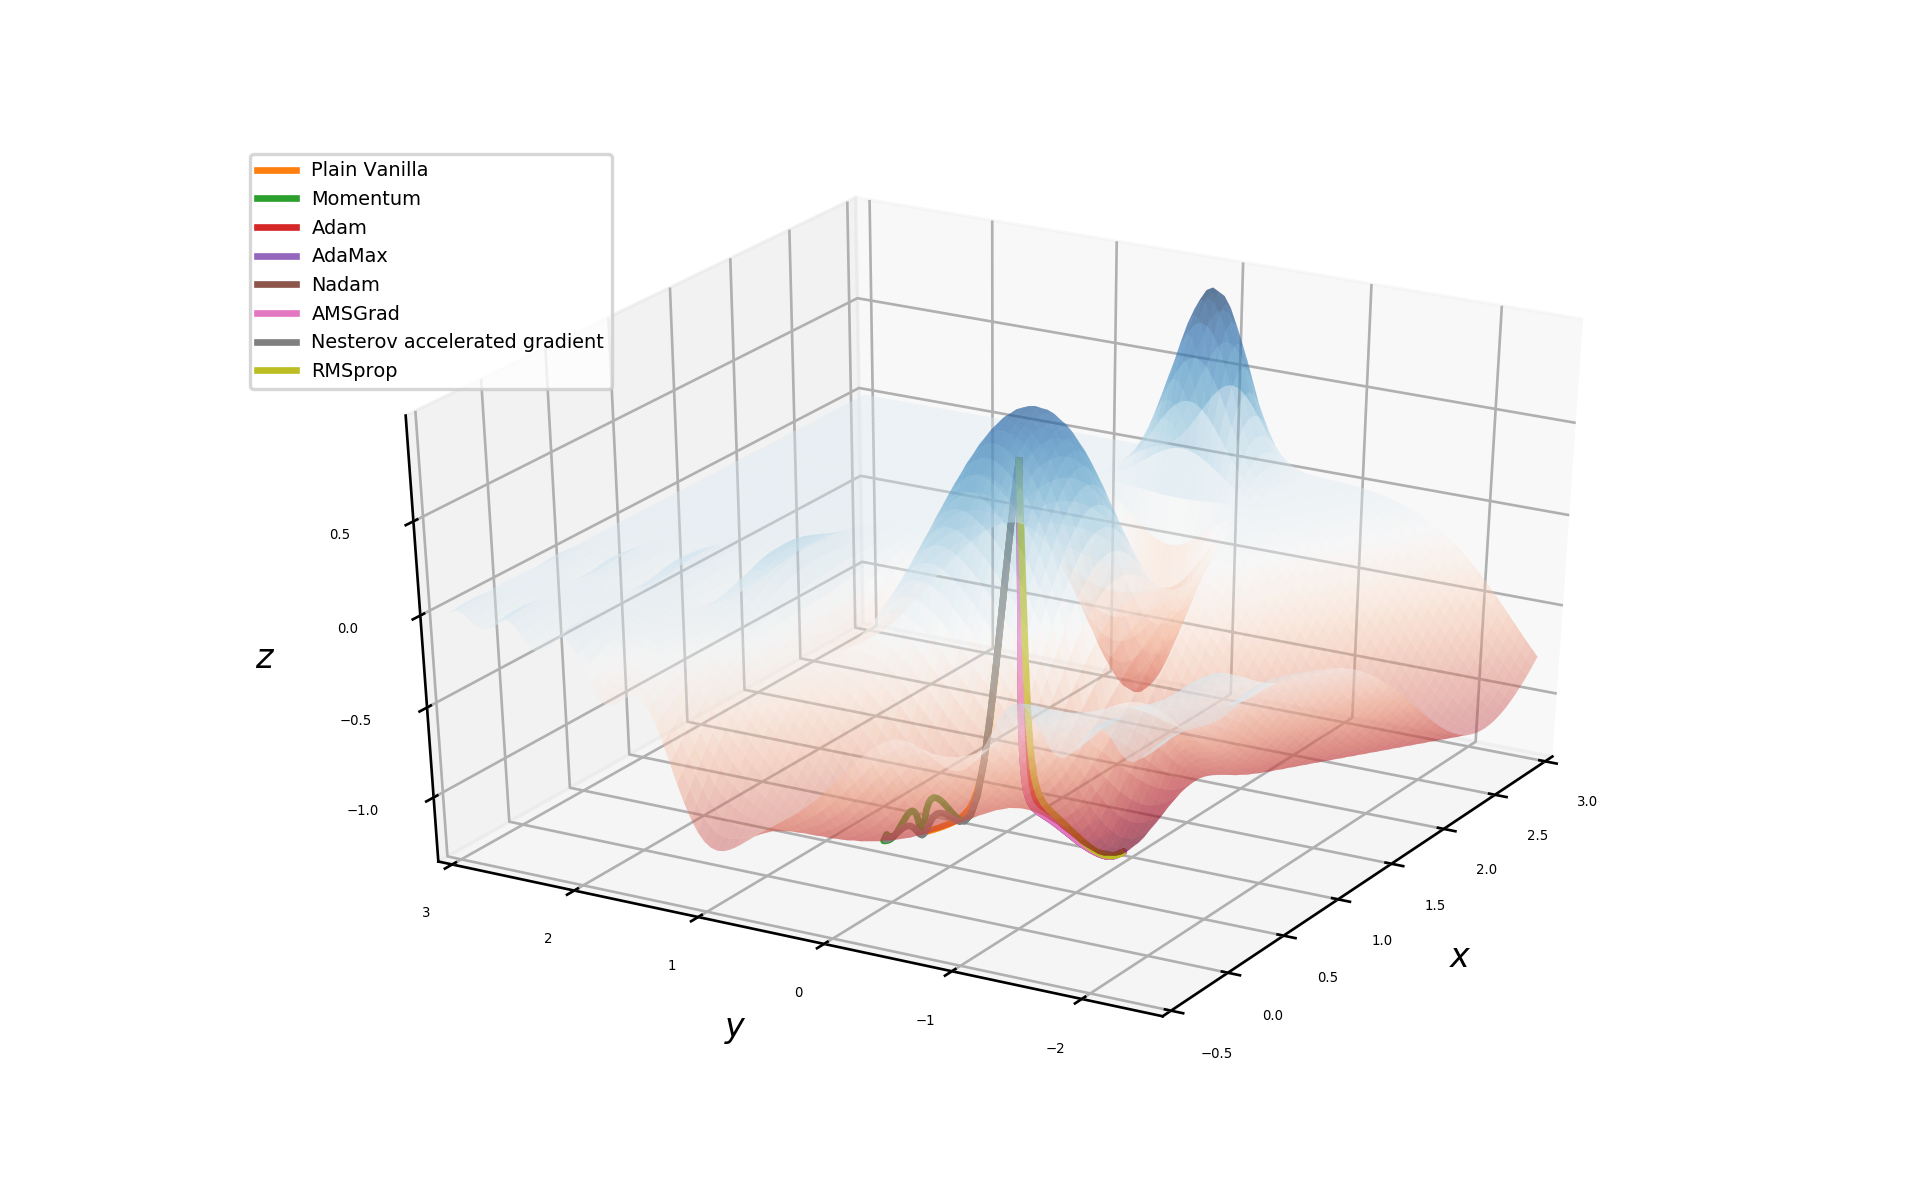

In [27]:
# Set Parameters and return array of x,y,z
xmin, xmax, xstep = -0.5, 3, 0.05
ymin, ymax, ystep = -2.5, 3, 0.05

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = noisy_fn(x, y)


# Plot figure
fig = plt.figure(figsize=(8, 5), dpi = 120)
ax = plt.axes(projection='3d', elev = 32, azim = -150)

ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='RdBu', edgecolor='none', alpha = 0.4)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.xaxis.set_tick_params(labelsize=4)
ax.yaxis.set_tick_params(labelsize=4)
ax.zaxis.set_tick_params(labelsize=4)

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation3D(*paths, zpaths=zpaths, labels=methods, ax=ax)

ax.legend(loc='upper left', fontsize = 'xx-small')


# Save as a gif
#anim.save('/Users/averysoh/Downloads/noisy_all.gif', writer='pillow', fps=60)

# Produce Video
# HTML(anim.to_html5_video())

[Top](#top)

<a id="ack"></a>

# Ackley Function Experiment

First we demonstrate the ability of plain vanilla GD to overcome local minima (larger step size) to find the global minima in a multi minima function like the Ackley Function. A sufficiently large step size allows the process to skip or bounce out of small local minima, this also causes some bouncing when it approaches the global minima. Experimentation with small step sizes causes the process to end prematurely in a local minima

  Plain Vanilla   
Converged in 249 steps.  
Loss fn 4.3881 
Achieved at coordinates x,y = (0.4325, 0.7444)


<IPython.core.display.Javascript object>


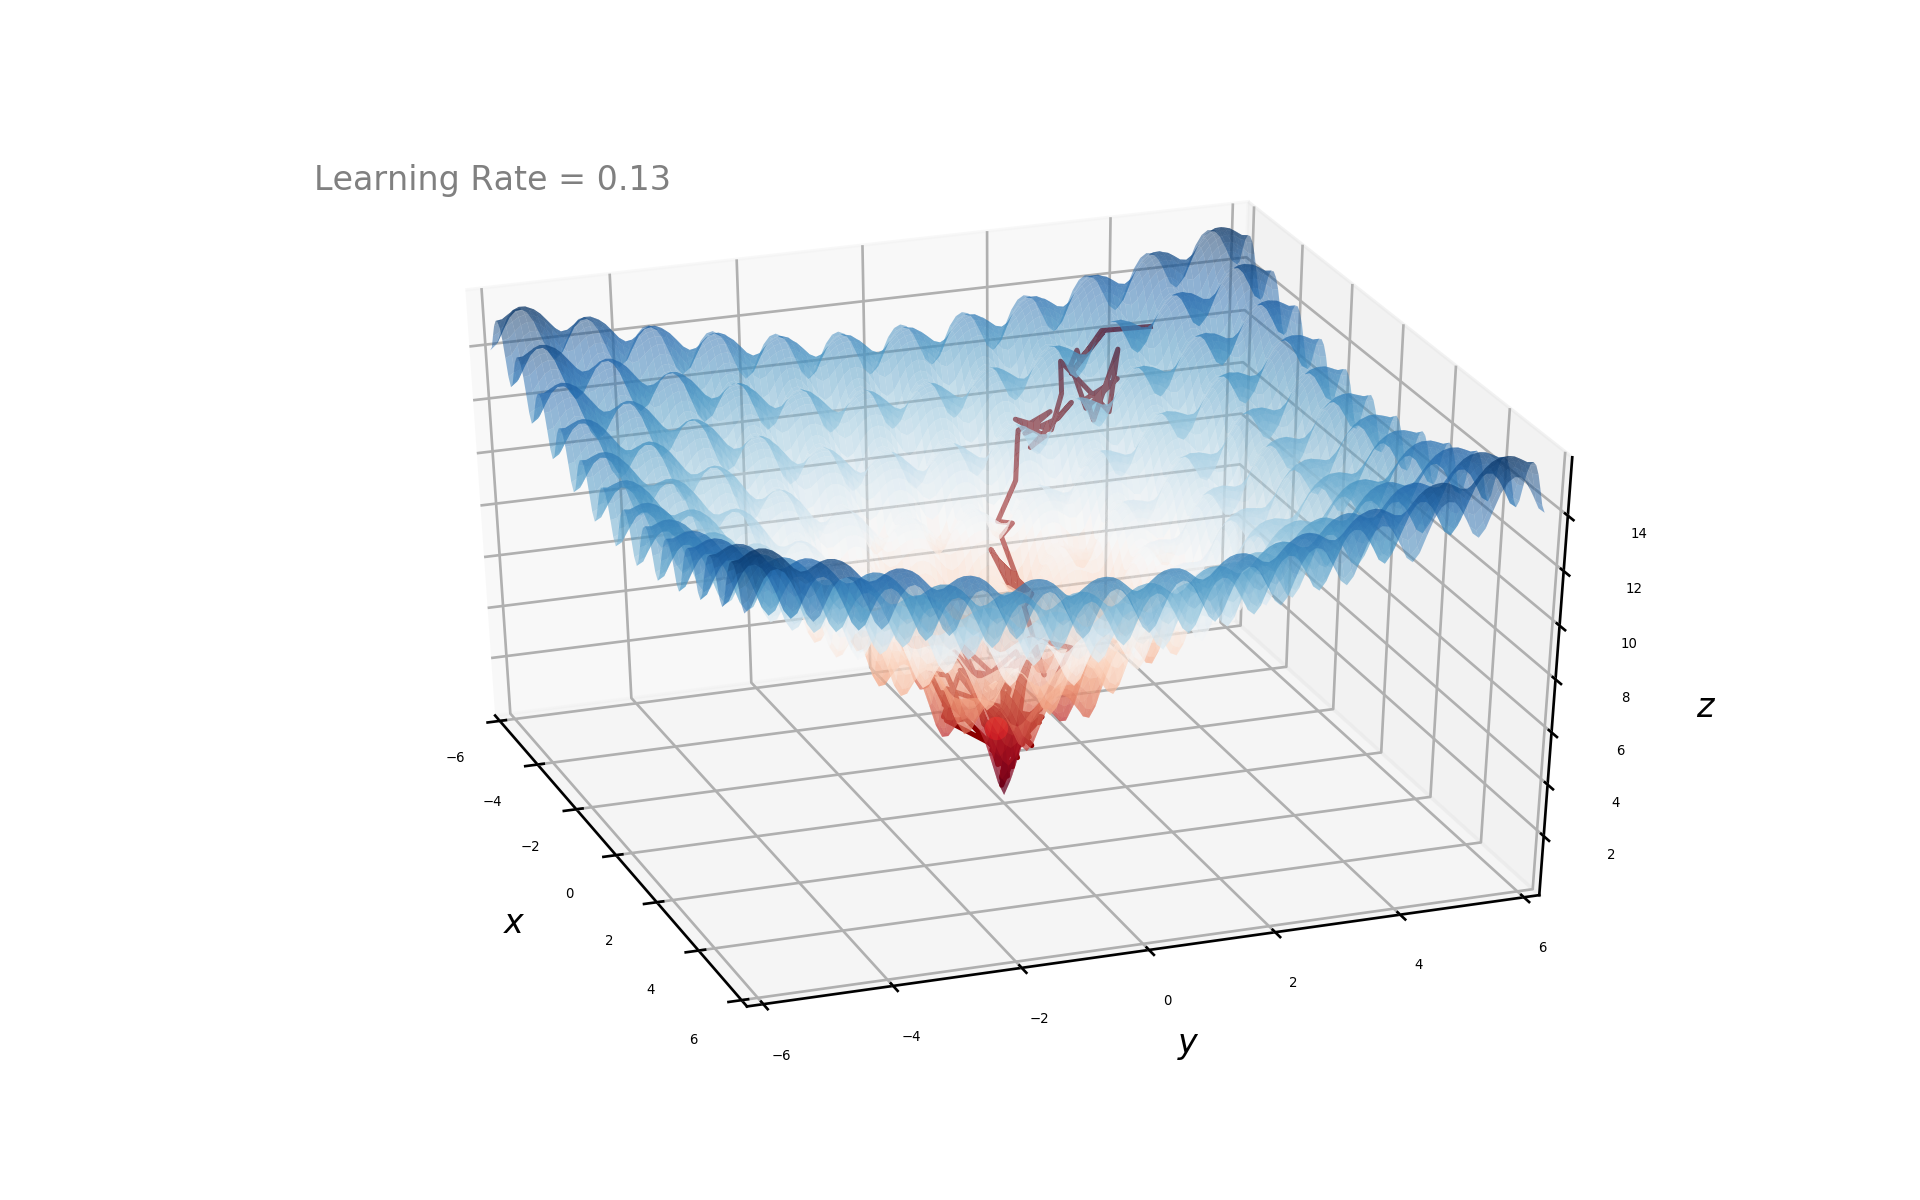

In [28]:
# Set Parameters and return array of x,y,z
xmin, xmax, xstep = -6, 6, 0.1
ymin, ymax, ystep = -6, 6, 0.1
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = ackley_fn(x, y)


# Obtain the path taken by pv gradient descent 
gd_ = gd(fn = ackley_fn, fn_grad=fn_grad)
x_path, y_path, z_path = gd_.pv(x_init=-5.0, y_init=4.2, 
                    n_iter= 250, lr=0.13, tol= 1e-5)
path = np.vstack((x_path, y_path))


# Plot figure
fig = plt.figure(figsize=(8, 5), dpi = 120)
ax = plt.axes(projection='3d', elev=34, azim=-20)

ax.plot_surface(x, y, z, rstride=1, cstride=1, 
                edgecolor='none', alpha=.5, cmap=plt.cm.RdBu)

line, = ax.plot([], [], [], 'darkred', label='Plain Vanilla GD', lw=1.5)
point, = ax.plot([], [], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.xaxis.set_tick_params(labelsize=4)
ax.yaxis.set_tick_params(labelsize=4)
ax.zaxis.set_tick_params(labelsize=4)

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

# Text for learning rate
ax.text2D(0.05, 0.95, "Learning Rate = 0.13", transform=ax.transAxes, color='gray')

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(ackley_fn(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(ackley_fn(*path[::,i-1:i]))
    return line, point

plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

# Save as a gif
#anim.save('/Users/averysoh/Downloads/ackley_pv.gif', writer='pillow', fps=60)

# Produce video
#HTML(anim.to_html5_video())

Next We try the same thing but with 8 variants of gradient descent.

In [29]:
gd_ = gd(fn = ackley_fn, fn_grad=fn_grad)

In [30]:
x_init = -5.
y_init = 4.2
n_iter = 100
lr = 0.13


# Obtain the path taken by pv gradient descent 
x_path_, y_path_, junk = gd_.pv(x_init=x_init,y_init=y_init, n_iter=n_iter, lr=lr, tol= 1e-5)
pv_path = np.vstack((x_path_, y_path_))

# Obtain the path taken by momentum gradient descent 
x_path, y_path, junk = gd_.momentum(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr, 
                          beta = 0.9)
momentum_path = np.vstack((x_path, y_path))

# Obtain the path taken by adam 
x_path_1, y_path_1, junk = gd_.adam(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
adam_path = np.vstack((x_path_1, y_path_1))

# Obtain the path taken by adamax 
x_path_2, y_path_2, junk = gd_.adamax(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
adamax_path = np.vstack((x_path_2, y_path_2))

# Obtain the path taken by Nadam
x_path_3, y_path_3, junk = gd_.nadam(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
nadam_path = np.vstack((x_path_3, y_path_3))

# Obtain the path taken by AMSGrad
x_path_4, y_path_4, junk = gd_.amsgrad(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
amsgrad_path = np.vstack((x_path_4, y_path_4))

# Obtain the path taken by Nesterov accelerated gradient
x_path_5, y_path_5, junk = gd_.nag(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr)
nag_path = np.vstack((x_path_5, y_path_5))

# Obtain the path taken by RMSprop
x_path_6, y_path_6, junk = gd_.RMSprop(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr)
rmsprop_path = np.vstack((x_path_6, y_path_6))

  Plain Vanilla   
Converged in 99 steps.  
Loss fn 5.0173 
Achieved at coordinates x,y = (0.5364, -1.1106)
  Momentum   
Converged in 99 steps.  
Loss fn 22.2662 
Achieved at coordinates x,y = (0.4879, -76.6491)
  Adam   
Converged in 99 steps.  
Loss fn 11.9013 
Achieved at coordinates x,y = (-4.9828, 3.9868)
  AdaMax   
Converged in 99 steps.  
Loss fn 11.9013 
Achieved at coordinates x,y = (-4.9830, 3.9858)
  Nadam   
Converged in 26 steps.  
Loss fn 11.9013 
Achieved at coordinates x,y = (-4.9832, 3.9865)
  AMSGrad   
Converged in 99 steps.  
Loss fn 11.9013 
Achieved at coordinates x,y = (-4.9829, 3.9873)
  Nesterov accelerated gradient   
Converged in 99 steps.  
Loss fn 21.7911 
Achieved at coordinates x,y = (-30.0961, -46.4795)
  RMSprop   
Converged in 99 steps.  
Loss fn 12.1111 
Achieved at coordinates x,y = (-5.0447, 3.9195)


In [31]:
methods = [
    "Plain Vanilla",
    "Momentum",
    "Adam",
    "AdaMax",
    "Nadam",
    "AMSGrad",
    "Nesterov accelerated gradient",
    "RMSprop"
]

pv_df = pd.DataFrame(pv_path)
pv_df.rename(index = {0: "Plain Vanilla", 
                     1:"Plain Vanilla"}, inplace = True) 

momen_df = pd.DataFrame(momentum_path)
momen_df.rename(index = {0: "Momentum", 
                     1:"Momentum"}, inplace = True) 

adam_df = pd.DataFrame(adam_path)
adam_df.rename(index = {0: "Adam", 
                     1:"Adam"}, inplace = True) 

adamax_df = pd.DataFrame(adamax_path)
adamax_df.rename(index = {0: "AdaMax", 
                     1:"AdaMax"}, inplace = True) 

nadam_df = pd.DataFrame(adamax_path)
nadam_df.rename(index = {0: "Nadam", 
                     1:"Nadam"}, inplace = True) 

amsgrad_df = pd.DataFrame(adamax_path)
amsgrad_df.rename(index = {0: "AMSGrad", 
                     1:"AMSGrad"}, inplace = True) 

rmsprop_df = pd.DataFrame(rmsprop_path)
rmsprop_df.rename(index = {0: "RMSprop", 
                     1:"RMSprop"}, inplace = True) 

nag_df = pd.DataFrame(nag_path)
nag_df.rename(index = {0: "Nesterov accelerated gradient", 
                     1:"Nesterov accelerated gradient"}, inplace = True) 


paths_ = pv_df
paths_ = paths_.append(momen_df)
paths_ = paths_.append(adam_df)
paths_ = paths_.append(adamax_df)
paths_ = paths_.append(nadam_df)
paths_ = paths_.append(amsgrad_df)
paths_ = paths_.append(rmsprop_df)
paths_ = paths_.append(nag_df)



# Draw path and loss path from individual methods
paths = [np.array(paths_.loc[method]) for method in methods]

zpaths = [ackley_fn(*path) for path in paths]


<IPython.core.display.Javascript object>


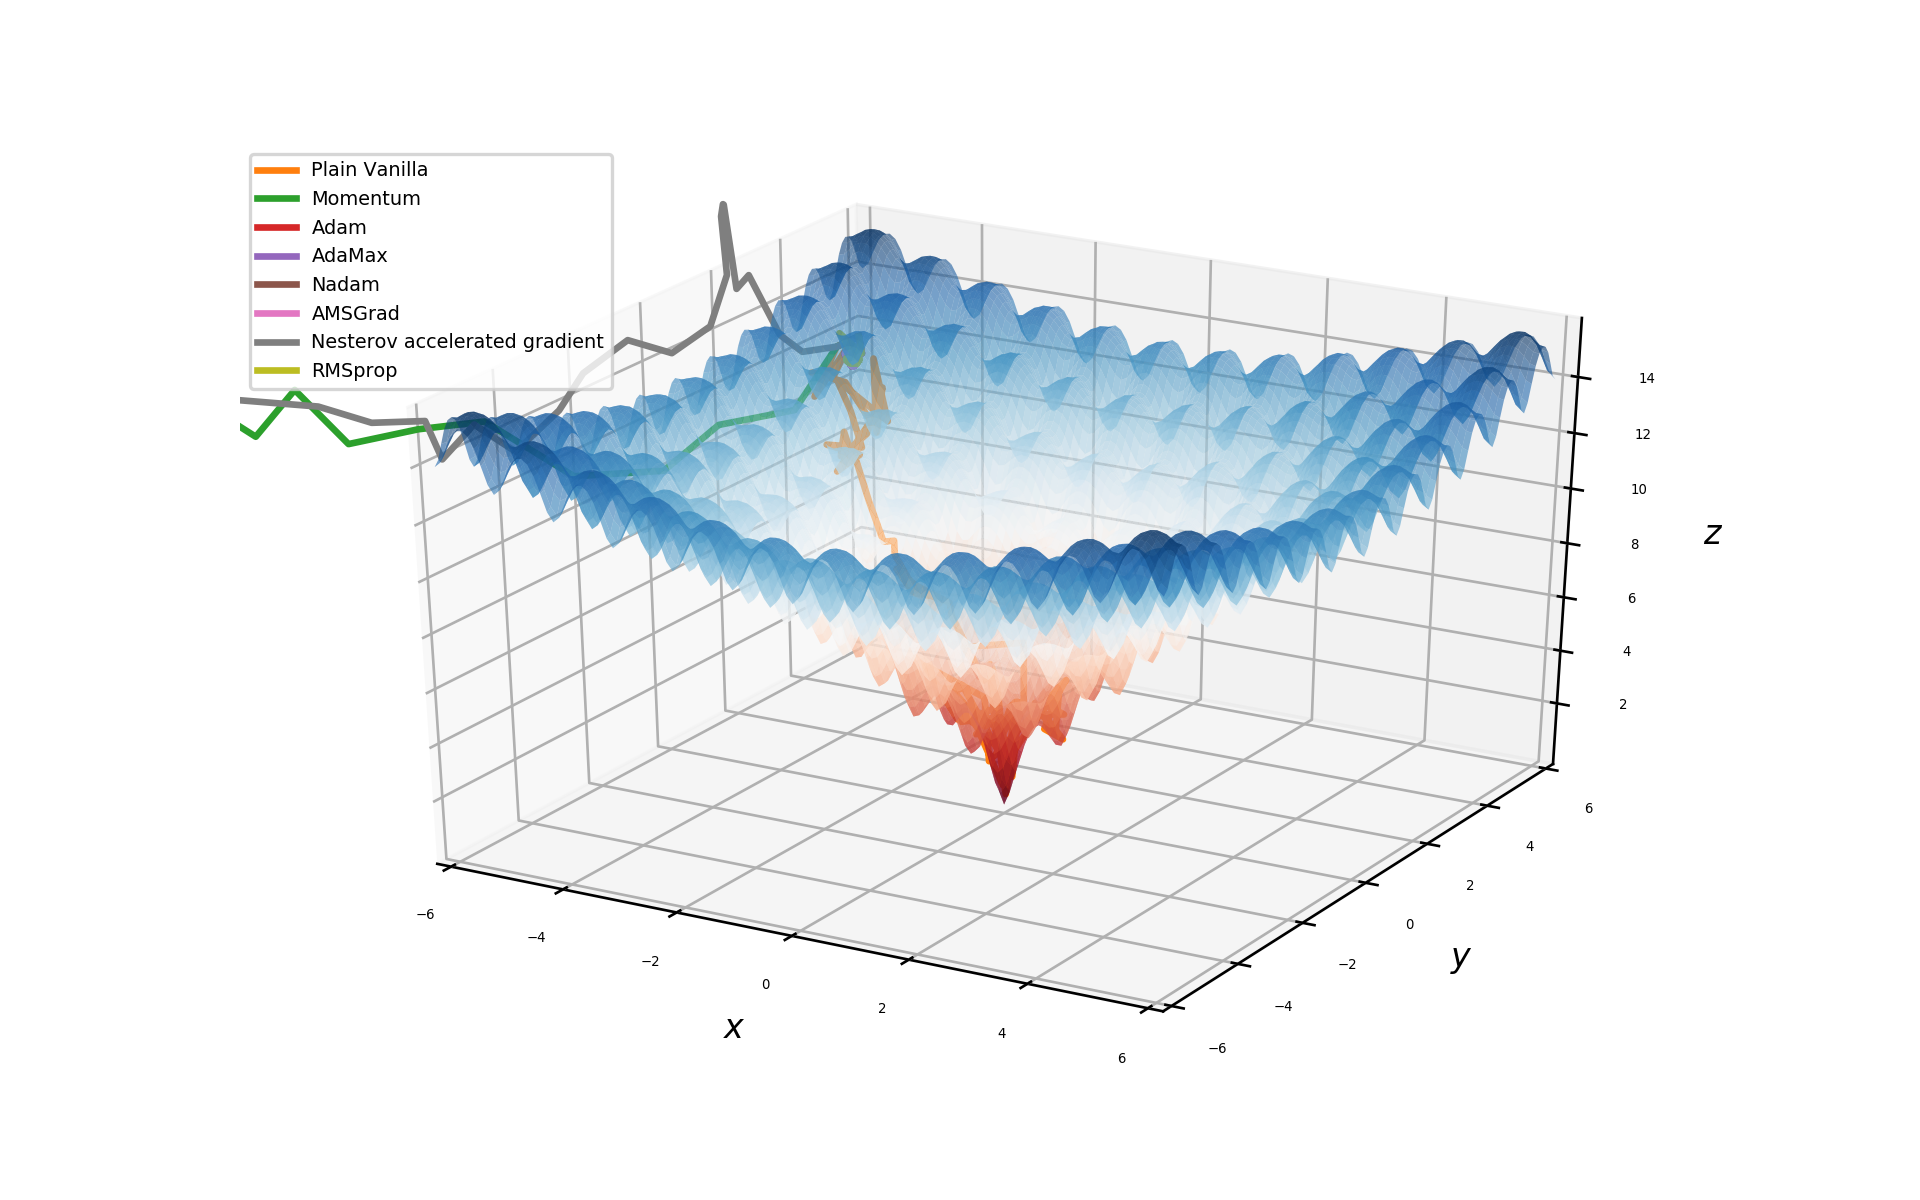

In [32]:
# Set Parameters and return array of x,y,z
xmin, xmax, xstep = -6, 6, 0.1
ymin, ymax, ystep = -6, 6, 0.1

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = ackley_fn(x, y)


# Plot figure
fig = plt.figure(figsize=(8, 5), dpi = 120)
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='RdBu', edgecolor='none', alpha = 0.6)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.xaxis.set_tick_params(labelsize=4)
ax.yaxis.set_tick_params(labelsize=4)
ax.zaxis.set_tick_params(labelsize=4)

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation3D(*paths, zpaths=zpaths, labels=methods, ax=ax)

ax.legend(loc='upper left', fontsize = 'xx-small')

**Results**

Not too successful with only the plain vanilla reaching close to the global minima, the other variants either bounced out or gets trapped in a local minima.

[Top](#top)

<a id="six"></a>

# Six Hump Experimentation

In [20]:
gd_ = gd(fn = sixhump_fn, fn_grad=fn_grad)

In [21]:
# x_init = -2.
x_init = -1.3
y_init = -1.
n_iter = 300
lr = 0.01


# Obtain the path taken by pv gradient descent 
x_path_, y_path_, junk = gd_.pv(x_init=x_init,y_init=y_init, n_iter=n_iter, lr=lr, tol= 1e-5)
pv_path = np.vstack((x_path_, y_path_))

# Obtain the path taken by momentum gradient descent 
x_path, y_path, junk = gd_.momentum(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr, 
                          beta = 0.9)
momentum_path = np.vstack((x_path, y_path))

# Obtain the path taken by adam 
x_path_1, y_path_1, junk = gd_.adam(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
adam_path = np.vstack((x_path_1, y_path_1))

# Obtain the path taken by adamax 
x_path_2, y_path_2, junk = gd_.adamax(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
adamax_path = np.vstack((x_path_2, y_path_2))

# Obtain the path taken by Nadam
x_path_3, y_path_3, junk = gd_.nadam(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
nadam_path = np.vstack((x_path_3, y_path_3))

# Obtain the path taken by AMSGrad
x_path_4, y_path_4, junk = gd_.amsgrad(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr,
                         beta_1=0.9, beta_2=0.99, tol=1e-5, epsilon=1e-8)
amsgrad_path = np.vstack((x_path_4, y_path_4))

# Obtain the path taken by Nesterov accelerated gradient
x_path_5, y_path_5, junk = gd_.nag(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr)
nag_path = np.vstack((x_path_5, y_path_5))

# Obtain the path taken by RMSprop
x_path_6, y_path_6, junk = gd_.RMSprop(x_init=x_init,y_init=y_init, n_iter=n_iter,lr=lr)
rmsprop_path = np.vstack((x_path_6, y_path_6))


#===============
# Data Storage
#===============

methods = [
    "Plain Vanilla",
    "Momentum",
    "Adam",
    "AdaMax",
    "Nadam",
    "AMSGrad",
    "Nesterov accelerated gradient",
    "RMSprop"
]

pv_df = pd.DataFrame(pv_path)
pv_df.rename(index = {0: "Plain Vanilla", 
                     1:"Plain Vanilla"}, inplace = True) 

momen_df = pd.DataFrame(momentum_path)
momen_df.rename(index = {0: "Momentum", 
                     1:"Momentum"}, inplace = True) 

adam_df = pd.DataFrame(adam_path)
adam_df.rename(index = {0: "Adam", 
                     1:"Adam"}, inplace = True) 

adamax_df = pd.DataFrame(adamax_path)
adamax_df.rename(index = {0: "AdaMax", 
                     1:"AdaMax"}, inplace = True) 

nadam_df = pd.DataFrame(adamax_path)
nadam_df.rename(index = {0: "Nadam", 
                     1:"Nadam"}, inplace = True) 

amsgrad_df = pd.DataFrame(adamax_path)
amsgrad_df.rename(index = {0: "AMSGrad", 
                     1:"AMSGrad"}, inplace = True) 

rmsprop_df = pd.DataFrame(rmsprop_path)
rmsprop_df.rename(index = {0: "RMSprop", 
                     1:"RMSprop"}, inplace = True) 

nag_df = pd.DataFrame(nag_path)
nag_df.rename(index = {0: "Nesterov accelerated gradient", 
                     1:"Nesterov accelerated gradient"}, inplace = True) 


paths_ = pv_df
paths_ = paths_.append(momen_df)
paths_ = paths_.append(adam_df)
paths_ = paths_.append(adamax_df)
paths_ = paths_.append(nadam_df)
paths_ = paths_.append(amsgrad_df)
paths_ = paths_.append(rmsprop_df)
paths_ = paths_.append(nag_df)



# Draw path and loss path from individual methods
paths = [np.array(paths_.loc[method]) for method in methods]

zpaths = [sixhump_fn(*path) for path in paths]

  Plain Vanilla   
Converged in 201 steps.  
Loss fn -1.0316 
Achieved at coordinates x,y = (0.0898, -0.7127)
  Momentum   
Converged in 196 steps.  
Loss fn -0.2155 
Achieved at coordinates x,y = (-1.7036, 0.7961)
  Adam   
Converged in 225 steps.  
Loss fn -1.0316 
Achieved at coordinates x,y = (0.0900, -0.7127)
  AdaMax   
Converged in 259 steps.  
Loss fn -1.0316 
Achieved at coordinates x,y = (0.0899, -0.7127)
  Nadam   
Converged in 206 steps.  
Loss fn -1.0316 
Achieved at coordinates x,y = (0.0900, -0.7127)
  AMSGrad   
Converged in 139 steps.  
Loss fn -1.0316 
Achieved at coordinates x,y = (0.0932, -0.7128)
  Nesterov accelerated gradient   
Converged in 80 steps.  
Loss fn -0.2155 
Achieved at coordinates x,y = (-1.7036, 0.7961)
  RMSprop   
Converged in 299 steps.  
Loss fn -1.0313 
Achieved at coordinates x,y = (0.0948, -0.7076)


<IPython.core.display.Javascript object>


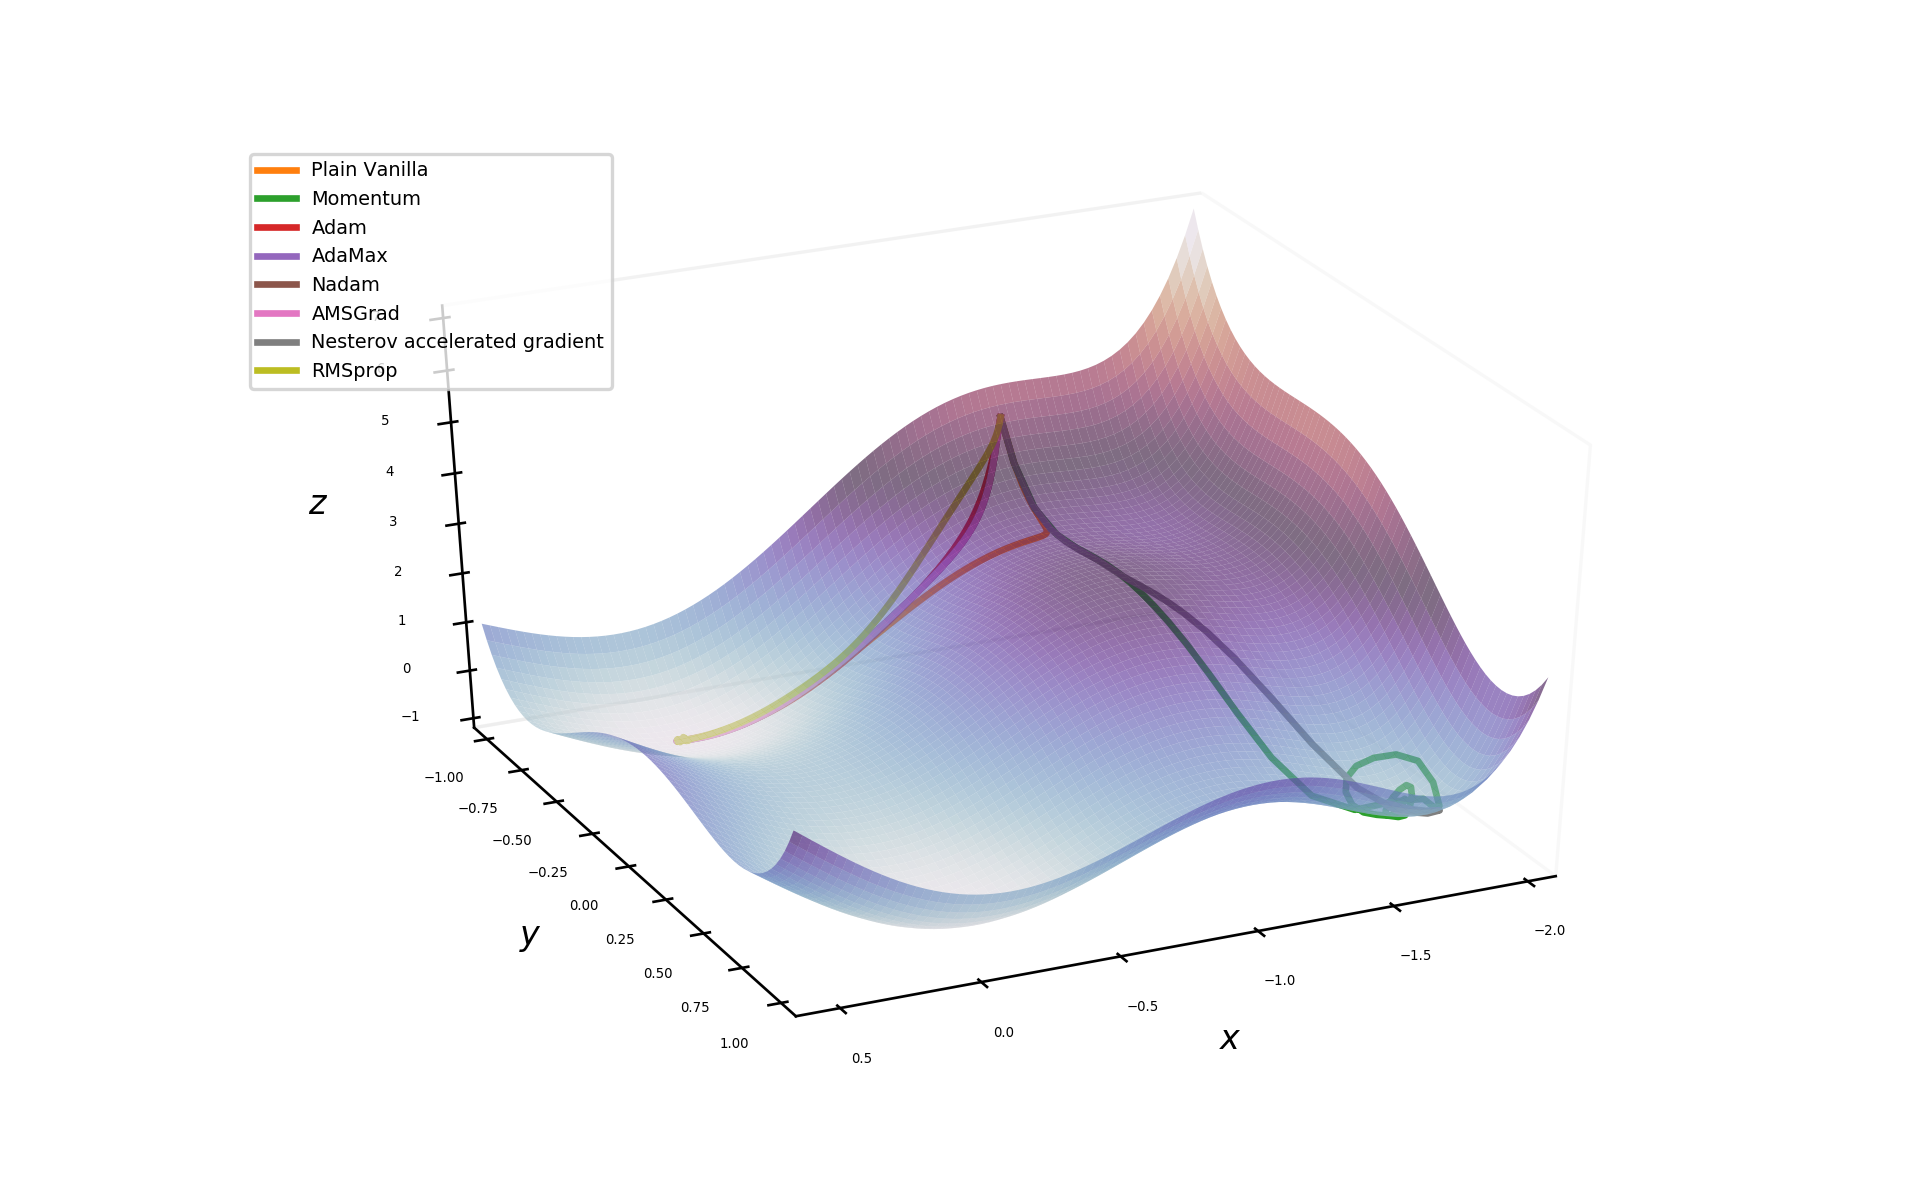

In [22]:
# Set Parameters and return array of x,y,z
xmin, xmax, xstep = -2.05, 0.6, 0.03
ymin, ymax, ystep = -1.05, 1.05, 0.03

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = sixhump_fn(x, y)


# Plot figure
fig = plt.figure(figsize=(8, 5), dpi = 120)
ax = plt.axes(projection='3d', elev = 35, azim = 65)

ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='twilight', edgecolor='none', alpha = 0.62)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.xaxis.set_tick_params(labelsize=4)
ax.yaxis.set_tick_params(labelsize=4)
ax.zaxis.set_tick_params(labelsize=4)

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

# Remove background and grid
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


anim = TrajectoryAnimation3D(*paths, zpaths=zpaths, labels=methods, ax=ax)

ax.legend(loc='upper left', fontsize = 'xx-small')

# Save as a gif
#anim.save('/Users/averysoh/Downloads/sixhump_all3.gif', writer='pillow', fps=60, dpi = 120)

# Produce video
#HTML(anim.to_html5_video())

[Top](#top)